In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import json

import seaborn as sns

%matplotlib inline

In [53]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

* 1차원 분포 플롯
* barplot():카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 차크
* 평균은 막대의 높이, 편차 에러바

In [5]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

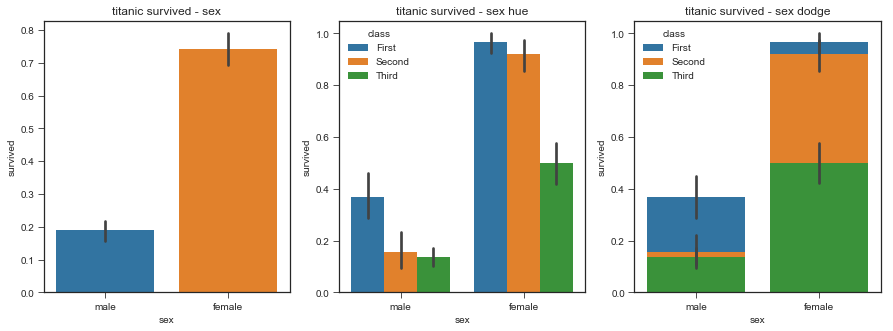

In [15]:
# barplot 
# 스타일 테마를 설정 5가지 : darkgrid,whitegrid,dark,white,ticks
sns.set_style('ticks')

# 그래프 객체를 생성하기 위한 피겨객체 업어오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('titanic survived - sex')
area02 = fig.add_subplot(1,3,2)
area02.set_title('titanic survived - sex hue')
area03 = fig.add_subplot(1,3,3)
area03.set_title('titanic survived - sex dodge')

#성별에 따른 생존율
sns.barplot(x='sex', y='survived', data=titanic, ax=area01)

#hue = 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=area02)

#dodge = 
sns.barplot(x='sex', y='survived', hue='class', dodge = False, data=titanic, ax=area03)



plt.show()

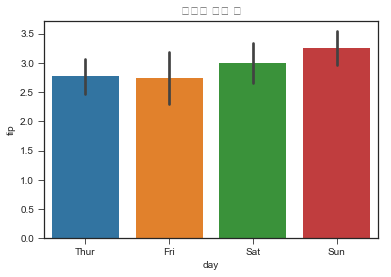

In [20]:
# tips.barplot()
# 요일별 전체 팁을 시각화
sns.barplot(x='day', y='tip',data=tips)
plt.title('요일별 전체 팁')
plt.show()

* countplot() : 카테고리 값별로 데이터 빈도를 표시하는 자료

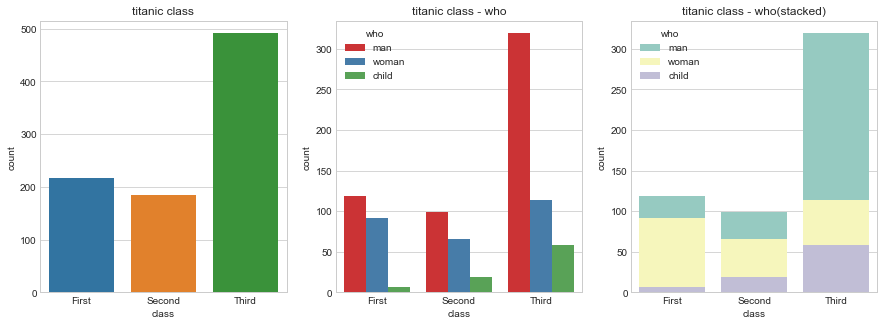

In [25]:
# countplot 
# 스타일 테마를 설정 5가지 : darkgrid,whitegrid,dark,white,ticks
sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨객체 업어오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('titanic class')
area02 = fig.add_subplot(1,3,2)
area02.set_title('titanic class - who')
area03 = fig.add_subplot(1,3,3)
area03.set_title('titanic class - who(stacked)')

# 기본
sns.countplot(x='class', data=titanic, ax=area01)

# hue = 
sns.countplot(x='class',hue='who', palette = 'Set1', data=titanic, ax=area02)

# dodge = 
sns.countplot(x='class', hue='who', palette = 'Set3', dodge = False, data=titanic, ax=area03)


plt.show()

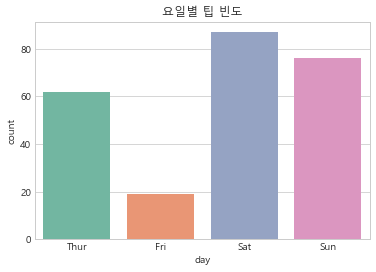

In [32]:
# tips를 이용한 countplot()
# 요일별로 팁을 준 빈도를 시각화 한다면?
sns.countplot(x='day',data=tips, palette = 'Set2')
plt.title('요일별 팁 빈도')
plt.show()

* stripplot() : 스카터플롯처럼 모든 데이터를 점으로 시각화
* jitter = True 설정하면 위치를 무작위로 바꿔서 겹치지않게 해줌

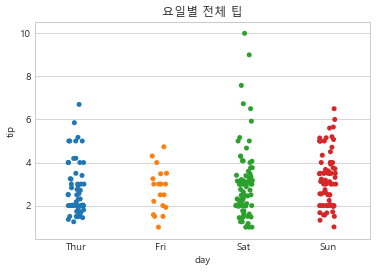

In [34]:
sns.stripplot(x='day', y='tip', data=tips, jitter=True)
plt.title('요일별 전체 팁')
plt.show()

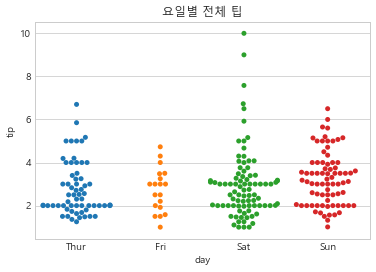

In [35]:
sns.swarmplot(x='day', y='tip', data=tips)
plt.title('요일별 전체 팁')
plt.show()

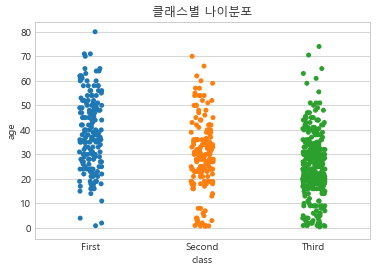

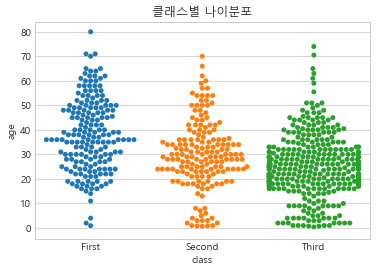

In [42]:
#타이타닉 데이터를 이용하여 서브플롯을 2개 영역으로 만들고 class별 나이의 분포를 확인하라(stripplot(), swarmplot())
sns.stripplot(x='class', y='age', data=titanic, jitter=True)
plt.title('클래스별 나이분포')
plt.show()

sns.swarmplot(x='class', y='age', data=titanic)
plt.title('클래스별 나이분포')
plt.show()

* boxplot(), violinplot()

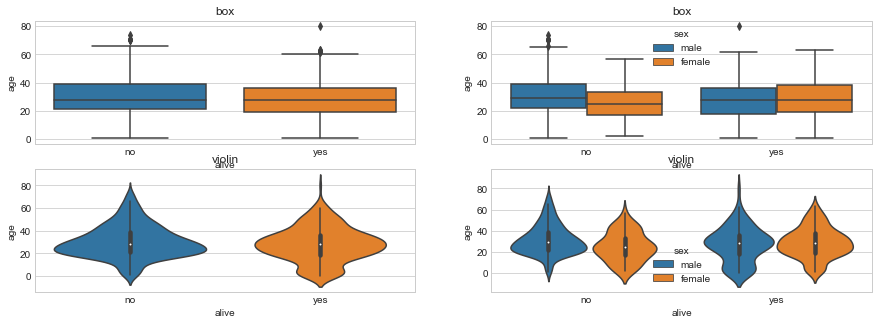

In [50]:
# 스타일 테마를 설정 5가지 : darkgrid,whitegrid,dark,white,ticks
sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨객체 업어오기
fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(2,2,1)
ax01.set_title('box')
ax02 = fig.add_subplot(2,2,2)
ax02.set_title('box')
ax03 = fig.add_subplot(2,2,3)
ax03.set_title('violin')
ax04 = fig.add_subplot(2,2,4)
ax04.set_title('violin')

sns.boxplot(x='alive', y='age', data=titanic, ax=ax01)
sns.boxplot(x='alive', y='age', hue='sex',data=titanic, ax=ax02)

sns.violinplot(x='alive', y='age', data=titanic, ax=ax03)
sns.violinplot(x='alive', y='age', hue='sex',data=titanic, ax=ax04)

plt.show()


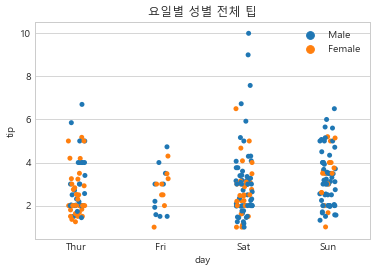

In [54]:
# 만약에 tips에서 요일별, 성별 전체 팁 stripplot() 시각화
sns.stripplot(x='day',y='tip',hue='sex',data=tips, jitter=True)
plt.title('요일별 성별 전체 팁')
plt.legend(loc='best')
plt.show()

* heatmap : 하나 이상의 카테고리 값의 변화를 색깔변화로 시각화 하는 자료

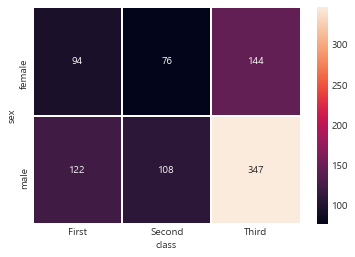

In [76]:
# titanic
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
# 인덱스 성별, 열 클래스
table = titanic.pivot_table(index=['sex'], columns = ['class'], aggfunc='size')
# table.head()
sns.heatmap(table,
           annot=True, fmt='d', linewidth=1)
plt.show()

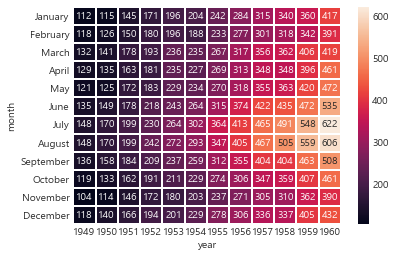

In [78]:
# flights 연도, 월별 승객수에 대한 heatmap(x 연도, y 월)
flights_pt = flights.pivot('month','year','passengers')
# flights_pt.head()

sns.heatmap(flights_pt, annot=True, fmt='d', linewidth=1)

plt.show()